In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

import pandas as pd

options = Options()
options.headless = False

driver = webdriver.Chrome(options=options, service=ChromeService(
    ChromeDriverManager().install()))
na_url = 'https://www.naughtyamerica.com/new-porn-videos?page=1'


[WDM] - Downloading: 100%|██████████| 6.29M/6.29M [00:01<00:00, 5.61MB/s]


In [ ]:
def scrape_na(driver, page):
    na_url = f'https://www.naughtyamerica.com/new-porn-videos?page={page}'
    driver.get(na_url)

    scenes = driver.find_elements(
        By.CSS_SELECTOR, '.scene-list .scene-grid-item a.contain-img')
    scenes_img = driver.find_elements(
        By.CSS_SELECTOR, '.scene-list .scene-grid-item a.contain-img .main-scene-img')
    scene_sites = driver.find_elements(By.CSS_SELECTOR, '.site-title')
    scene_dates = driver.find_elements(By.CSS_SELECTOR, 'p.entry-date')
    scene_durations = driver.find_elements(By.CSS_SELECTOR, '.scene-grid-item')
    scene_flags = driver.find_elements(
        By.CSS_SELECTOR, 'p.entry-date span.flag-contain')
    scene_performers = driver.find_elements(
        By.CSS_SELECTOR, 'p.contain-actors')

    scene_title_list = []
    scene_id_list = []
    scene_img_list = []
    scene_site_list = []
    scene_date_list = []
    scene_duration_list = []
    scene_flag_list = []
    scene_vr_list = []
    scene_creampie_list = []
    scene_anal_list = []
    scene_remaster_list = []
    scene_performer_list = []

    for sc_in in range(len(scenes)):
        try:
            scene_title = scenes[sc_in].get_attribute('title')
        except:
            scene_title = None
        scene_id = scenes[sc_in].get_attribute('data-scene-id')
        scene_img_url = scenes_img[sc_in].get_attribute('srcset')
        scene_site = scene_sites[sc_in].text
        scene_date = scene_dates[sc_in].text
        spl = scene_date.split(' ')
        scene_date = f"{spl[0]} {spl[1]} {spl[2]}"
        try:
            scene_duration = scene_durations[sc_in].find_elements(
                By.CSS_SELECTOR, 'p.scene-runtime')[0].text
        except:
            scene_duration = None

        flag_array = scene_flags[sc_in].find_elements(By.CSS_SELECTOR, 'a')
        farray = []
        for idx, f in enumerate(flag_array):
            farray.append(f.text)

        scene_flag = ", ".join(farray)

        scene_vr = 'VR' in farray
        scene_creampie = 'CREAMPIE' in farray
        scene_anal = 'ANAL' in farray
        scene_remaster = 'REMASTERED HD' in farray

        perf_array = scene_performers[sc_in].find_elements(
            By.CSS_SELECTOR, 'a')
        parray = []
        for idx, p in enumerate(perf_array):
            parray.append(p.text)
        scene_performer = ', '.join(parray)

        scene_id_list.append(scene_id)
        scene_title_list.append(scene_title)
        scene_img_list.append(scene_img_url)
        scene_site_list.append(scene_site)
        scene_date_list.append(scene_date)
        scene_duration_list.append(scene_duration)
        scene_flag_list.append(scene_flag)
        scene_vr_list.append(scene_vr)
        scene_creampie_list.append(scene_creampie)
        scene_anal_list.append(scene_anal)
        scene_remaster_list.append(scene_remaster)
        scene_performer_list.append(scene_performer)

        print(f"{page}|{sc_in+1}. {scene_title}")

    df = pd.DataFrame({
        'id': scene_id_list,
        'title': scene_title_list,
        'site': scene_site_list,
        'performer': scene_performer_list,
        'duration': scene_duration_list,
        'release_date': scene_date_list,
        'img_url': scene_img_list,
        'flag': scene_flag_list,
        'is_vr': scene_vr_list,
        'is_creampie': scene_creampie_list,
        'is_anal': scene_anal_list,
        'is_remaster': scene_remaster_list
    })
    return df


In [ ]:
scenes_df = pd.DataFrame()
for page in range(451, 465):
    d = scrape_na(driver, page)
    scenes_df = pd.concat([scenes_df, d]).reset_index(drop=True)


451|1. Mason Storm in Latin Adultery
451|2. Tiffany Taylor & Trent Soluri in My Sister's Hot Friend
451|3. Shy Love & Herschel Savage in Naughty Office
451|4. Angelica Sin & Kris Slater & Trent Soluri in My First Sex Teacher
451|5. Courtney Cummz & Mary Anne & Jerry in American Daydreams
451|6. Bridgett Lee & Trent Soluri in My Friend's Hot Mom
451|7. Charlotte Stokely & Kris Slater in Fast Times
451|8. Lucy Lee & Kris Knight in American Daydreams
451|9. Brianna Beach in Naughty Office
451|10. Leigh in My First Sex Teacher
451|11. Harley Rain in My Friend's Hot Mom
451|12. Domino in My Naughty Latin Maid
451|13. Daisy Duxe & Billy Glide in Naughty Office
451|14. Ashley Gracie in Naughty Bookworms
451|15. Mason Storm & Jack Venice in My First Sex Teacher
451|16. Memphis Monroe & James Deen in American Daydreams
451|17. Alyssa Star & Dino Bravo in Naughty Bookworms
451|18. Tory Lane & Randy Spears in Naughty Office
451|19. Charlee Chase in My First Sex Teacher
451|20. Harmony & Kris Knig

Thumbnail Viz


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from highlight_text import fig_text, ax_text

from PIL import Image
import urllib
import json
import os
import math

plt.style.use('../../assets/stylesheets/soc_base.mplstyle')


In [7]:
sc_df = pd.read_csv('../../data/na.csv', index_col=0).sort_values(by='id',
                                                                  ascending=False).reset_index(drop=True)


In [8]:
sites_wo = ['Mrs. Creampie',
            'Lesbian Girl On Girl',
            'My Girl Loves Anal',
            'College Sugar Babes',
            'Fast Times']
sc_clean = sc_df[(sc_df['is_remaster'] == False) &
                 (sc_df['is_vr'] == False) &
                 (sc_df['is_anal'] == False) &
                 ~(sc_df['site'].isin(sites_wo))]
selected_actor = pd.read_csv('../../data/na-actor-list.csv',
                             index_col=0).reset_index()
selected_actor = list(selected_actor['name'])

a = '|'.join(selected_actor)
sc_clean = sc_clean[sc_clean['performer'].str.contains(a)]

site_clean = sc_clean.groupby(['site'])['title'].count().reset_index(name='count').sort_values(['count'])
site_clean[site_clean['count']>=20]


site  count
16      My Daughter'S Hot Friend     20
3                Ass Masterpiece     30
35     Perfect Fucking Strangers     31
27             Naughty Bookworms     32
31            Naughty Rich Girls     33
25               Naughty America     34
23        My Wife Is My Pornstar     35
26             Naughty Athletics     43
1             American Daydreams     44
43                   Thundercock     56
11                Latin Adultery     68
18          My Friend'S Hot Girl     84
0             2 Chicks Same Time    100
20  My Girlfriend'S Busty Friend    104
15       My Dad'S Hot Girlfriend    117
33               Neighbor Affair    127
7               Dirty Wives Club    127
8               Housewife 1 On 1    129
36           Seduced By A Cougar    133
24          My Wife'S Hot Friend    162
22        My Sister'S Hot Friend    163
9                  I Have A Wife    178
17          My First Sex Teacher    234
30                Naughty Office    245
19           My Friend'S Hot Mom    344

In [2]:
def draw_thumbnails(data, nrows=2, ncols=2, offset=0):
    nrows, ncols = nrows*2, ncols
    w, h = 4.5, 1.8
    fig = plt.figure(figsize=(w*ncols, h*nrows), dpi=200)

    height_ratios = [(1/nrows)*2 if x %
                     2 == 0 else (1/nrows)/2 for x in range(nrows)]

    gspec = gridspec.GridSpec(
        ncols=ncols, nrows=nrows, figure=fig,
        height_ratios=height_ratios
    )
    gspec.update(wspace=0, hspace=0.1)

    counter = 0
    capt_counter = 0
    offset = offset

    for row in range(nrows):
        for col in range(ncols):
            if row % 2 == 0:
                ax = plt.subplot(gspec[row, col])
                try:
                    img_url = f"https:{data.iloc[offset+counter]['img_url']}"
                    scene_img = Image.open(urllib.request.urlopen(img_url))
                    ax.imshow(scene_img)
                    print(f"({offset+counter+1}/{len(data)}) {img_url}")
                    have = data.iloc[offset+counter]['have']
                    if have == True:
                        ax_text(
                            x=.95,
                            y=.95,
                            s=f'<DOWNLOADED>',
                            highlight_textprops=[
                                {'size': '12',
                                 'bbox': {'edgecolor': '#68bf9c',
                                          'facecolor': '#68bf9c',
                                          'pad': 2},
                                 'color': '#6f4404',
                                 'weight': 'bold'},
                            ],
                            ax=ax,
                            font='Karla',
                            ha='right',
                            size=10,
                            annotationbbox_kw={'xycoords': 'axes fraction'}
                        )
                except:
                    print(f'out of bond - {counter+1}')

                ax.axis('off')

                counter += 1
            else:
                logo_ax = plt.subplot(
                    gspec[row, col],
                    anchor='NW'
                )
                logo_ax.axis('off')
                try:
                    performers = data.iloc[offset+capt_counter]['performer']
                    site = data.iloc[offset+capt_counter]['site']
                    release_date = data.iloc[offset +
                                             capt_counter]['release_date']
                    is_creampie = data.iloc[offset+capt_counter]['is_creampie']

                    ax_text(
                        x=0.03,
                        y=1,
                        s=f'<{performers}>\n<{site}>\n<{release_date}>',
                        highlight_textprops=[
                            {'weight': 'bold'},
                            {'size': '9'},
                            {'size': '8', 'color': 'grey'},
                        ],
                        ax=logo_ax,
                        font='Karla',
                        ha='left',
                        size=10,
                        annotationbbox_kw={'xycoords': 'axes fraction'}
                    )
                    if is_creampie == True:
                        ax_text(
                            x=.95,
                            y=1,
                            s=f'<Creampie>',
                            highlight_textprops=[
                                {'size': '8', 'bbox': {'edgecolor': 'red',
                                                       'facecolor': 'red', 'pad': 1}, 'color': 'white'},
                            ],
                            ax=logo_ax,
                            font='Karla',
                            ha='right',
                            size=10,
                            annotationbbox_kw={'xycoords': 'axes fraction'}
                        )
                except:
                    print(f'out of bond - {capt_counter+1}')
                capt_counter += 1


In [17]:
sc_clean = pd.read_csv('../../data/na-clean.csv',index_col=0)
# sc_clean = sc_clean[(sc_clean['perf_count']>4)]

selected_actor = pd.read_csv('../../data/na-actor-list.csv',
                             index_col=0).reset_index()
selected_actor = list(selected_actor['name'])

(1/10) https://images2.naughtycdn.com/cms/nacmscontent/v1/scenes/naf/kaylatyler/scene/horizontal/800x534c.jpg 
(2/10) https://images5.naughtycdn.com/cms/nacmscontent/v1/scenes/no/kaylajmac/scene/horizontal/800x534c.jpg 
(3/10) https://images3.naughtycdn.com/cms/nacmscontent/v1/scenes/mfhg/kaylaricky/scene/horizontal/800x534c.jpg 
(4/10) https://images3.naughtycdn.com/cms/nacmscontent/v1/scenes/nam/kayladamon/scene/horizontal/800x534c.jpg 
(5/10) https://images2.naughtycdn.com/cms/nacmscontent/v1/scenes/ihw/kaylamike/scene/horizontal/800x534c.jpg 
(6/10) https://images1.naughtycdn.com/cms/nacmscontent/v1/scenes/nam/kaylajohnny/scene/horizontal/800x534c.jpg 
(7/10) https://images3.naughtycdn.com/cms/nacmscontent/v1/scenes/2cst/kaylaphoenixcharles/scene/horizontal/800x534c.jpg 
(8/10) https://images4.naughtycdn.com/cms/nacmscontent/v1/scenes/mshf/kaylakaydenjohnny/scene/horizontal/800x534c.jpg 
(9/10) https://images5.naughtycdn.com/cms/nacmscontent/v1/scenes/mwhf/kaylachad/scene/horizonta

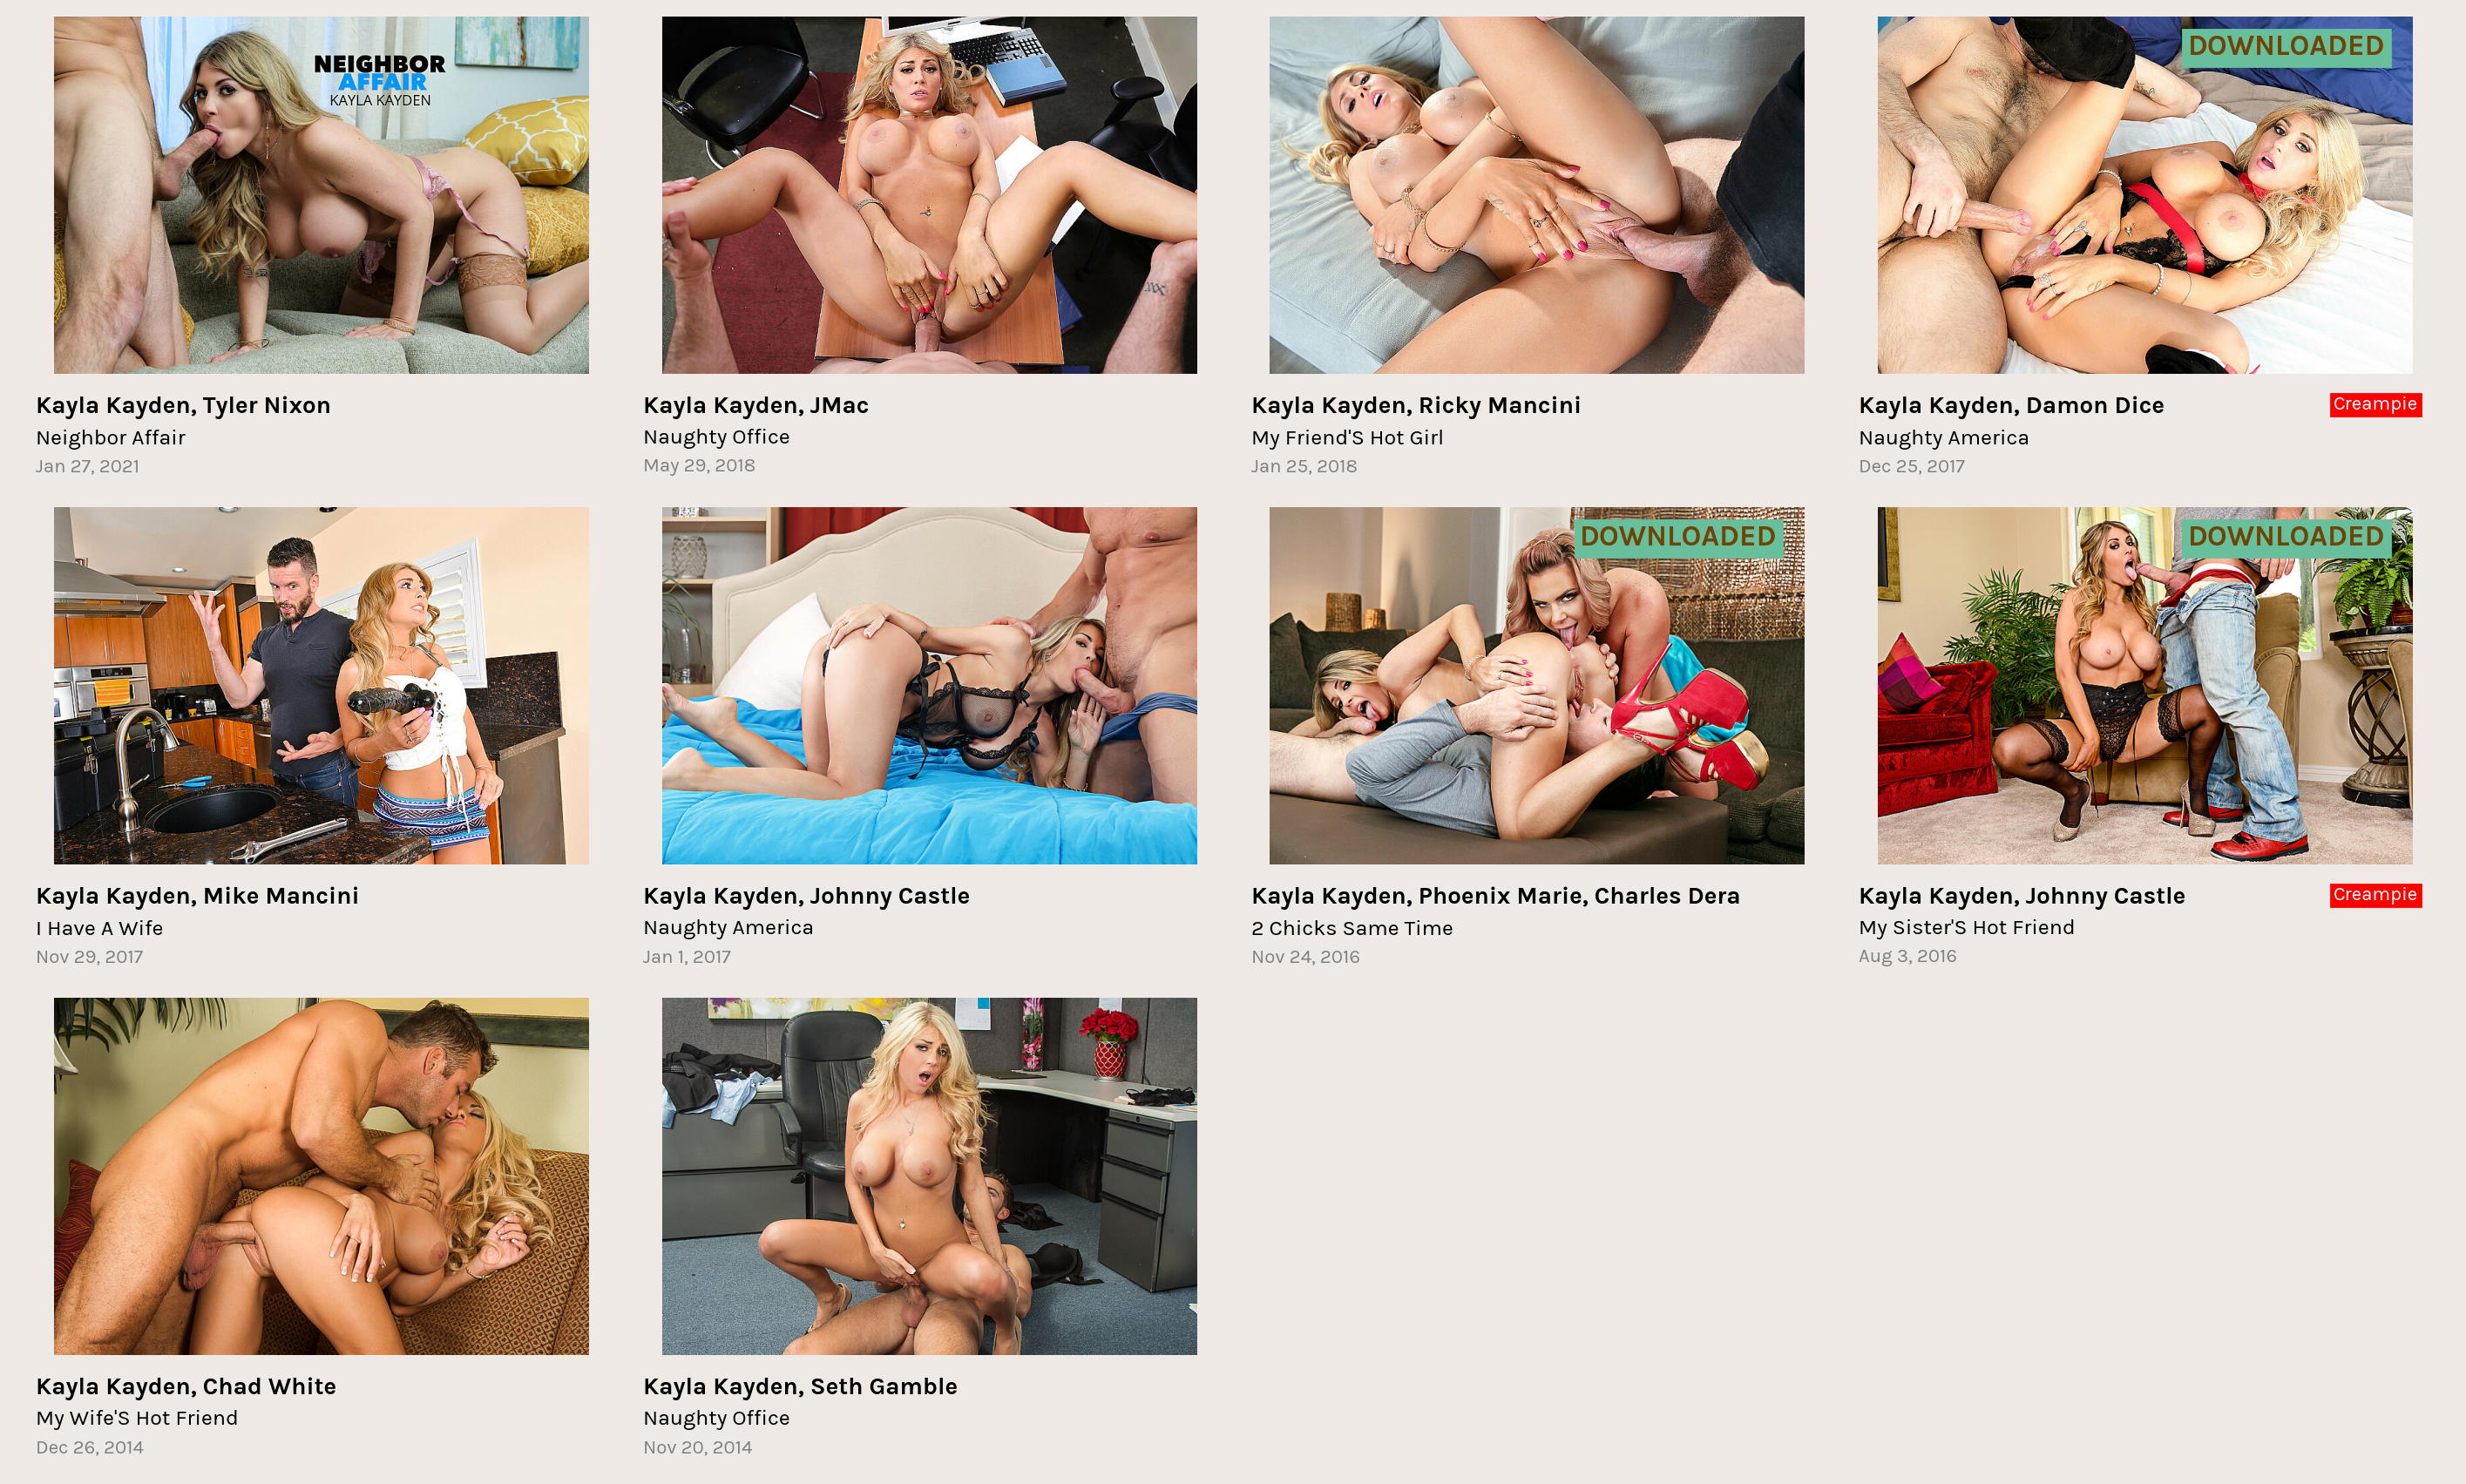

In [23]:
sc_selection = sc_clean.copy()

selected_actor = ['Kayla Kayden']
a = '|'.join(selected_actor)
sc_selection = sc_selection[sc_selection['performer'].str.contains(a)]

# selected_site = list(site_clean[site_clean['count']==35]['site'])
# selected_site = ["American Daydreams"]
# sc_selection = sc_selection[sc_selection['site'].isin(selected_site)]

# sc_selection = sc_selection[sc_selection['is_creampie'] == True]
# sc_selection = sc_selection[sc_selection['have'] != True]

page = 1

limit = 40
offset = (page-1)*limit

if len(sc_selection) > limit:
    sz = limit
else:
    sz = len(sc_selection)

if sz < 4:
    ncols = sz
else:
    ncols = 4
nrows = math.ceil(sz/ncols)

draw_thumbnails(data=sc_selection, nrows=nrows, ncols=ncols, offset=offset)


In [7]:
sc_by_actor = []
for i in range(len(sc_selection)):
    actors = sc_selection.iloc[i]['performer'].split(', ')
    for act in enumerate(actors):
        sc_by_actor.append({
            'id': sc_selection.iloc[i]['id'],
            'title': sc_selection.iloc[i]['title'],
            'actor': act[1],
            'site' : sc_selection.iloc[i]['site'],
            'have' : sc_selection.iloc[i]['have']
        })
sc_by_actor = pd.DataFrame(sc_by_actor).reset_index(drop=True)
sc_by_actor = sc_by_actor[sc_by_actor['actor'].isin(selected_actor)].reset_index(drop=True)


In [8]:
s = sc_by_actor.groupby(['actor'])['title'].count().reset_index(name='count').sort_values(by='count',ascending=False)